In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

In [2]:
df=pd.read_csv('UCI-electricity/UCI_data.csv') # Reading the data and displaying sample rows
df.sample(5, random_state=999)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
1292,2016-03-07 01:20:00,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60
8973,2016-05-18 07:50:00,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70
4158,2016-05-18 09:40:00,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80
3538,2016-03-11 06:40:00,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30
7261,2016-05-19 13:00:00,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50


In [3]:
df.shape

(19735, 28)

In [4]:
df.columns

Index(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy'],
      dtype='object')

In [5]:
#converting date into datetime
df['date'] = df['date'].astype('datetime64[ns]')

In [7]:
df['Date'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df.head(5)
#data['Dates'] = data['date'].values

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,Date,Time,hour,month
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,62.166667,8.823333,13.296667,21.00,29.318571,22.23,38.463333,19.926667,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60,2016-04-19,20:30:00,20,4
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,43.560000,1.230000,78.963333,18.39,32.290000,21.00,43.400000,18.390000,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50,2016-03-05,04:40:00,4,3
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,46.126667,6.033333,37.300000,21.29,27.566667,21.70,32.447500,19.390000,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80,2016-03-14,12:40:00,12,3
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,47.700000,4.595000,94.945000,16.20,33.590000,17.78,41.663333,15.800000,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40,2016-01-22,15:30:00,15,1
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,50.745000,2.530000,92.190000,20.00,40.000000,23.10,46.090000,18.890000,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60,2016-02-10,00:40:00,0,2


In [8]:
df_new_columns={
    'T1':'kitchen_temp',
    'RH_1':'kitchen_humid',
    'T2':'living_temp',
    'RH_2':'living_humid',
    'T3':'laundry_temp',
    'RH_3':'laundry_humid',
    'T4':'office_temp',
    'RH_4':'office_humid',
    'T5':'bathroom_temp',
    'RH_5':'bathroom_humid',
    'T6':'out_north_temp',
    'RH_6':'out_north_humid',
    'T7':'ironing_temp',
    'RH_7':'ironing_humid',
    'T8': 'teen2_temp',
    'RH_8' :'teen2_humid',
    'T9': 'parent_temp',
    'RH_9': 'parent_humid',
    'To': 'temp_out',
    'RH_out': 'humid_out'
    }
df = df.rename(columns = df_new_columns)
df.columns = df.columns.str.lower().str.strip()
df.sample(5, random_state=999)

,date,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bathroom_temp,bathroom_humid,out_north_temp,out_north_humid,ironing_temp,ironing_humid,teen2_temp,teen2_humid,parent_temp,parent_humid,t_out,press_mm_hg,humid_out,windspeed,visibility,tdewpoint,rv1,rv2,target_energy,date,time,hour,month
1292,2016-03-07 01:20:00,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60,2016-03-07,01:20:00,1,3
8973,2016-05-18 07:50:00,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70,2016-05-18,07:50:00,7,5
4158,2016-05-18 09:40:00,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80,2016-05-18,09:40:00,9,5
3538,2016-03-11 06:40:00,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30,2016-03-11,06:40:00,6,3
7261,2016-05-19 13:00:00,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50,2016-05-19,13:00:00,13,5


In [9]:
#Checking for missing/null values in each column
print(df.isnull().sum())

date               0
kitchen_temp       0
kitchen_humid      0
living_temp        0
living_humid       0
laundry_temp       0
laundry_humid      0
office_temp        0
office_humid       0
bathroom_temp      0
bathroom_humid     0
out_north_temp     0
out_north_humid    0
ironing_temp       0
ironing_humid      0
teen2_temp         0
teen2_humid        0
parent_temp        0
parent_humid       0
t_out              0
press_mm_hg        0
humid_out          0
windspeed          0
visibility         0
tdewpoint          0
rv1                0
rv2                0
target_energy      0
date               0
time               0
hour               0
month              0
dtype: int64


In [10]:
#Check the data type of variables
print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types of variable are given below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (19735, 32) 

Data types of variable are given below where 'object' indicates a string type: 
date               datetime64[ns]
kitchen_temp              float64
kitchen_humid             float64
living_temp               float64
living_humid              float64
laundry_temp              float64
laundry_humid             float64
office_temp               float64
office_humid              float64
bathroom_temp             float64
bathroom_humid            float64
out_north_temp            float64
out_north_humid           float64
ironing_temp              float64
ironing_humid             float64
teen2_temp                float64
teen2_humid               float64
parent_temp               float64
parent_humid              float64
t_out                     float64
press_mm_hg               float64
humid_out                 float64
windspeed                 float64
visibility                float64
tdewpoint                 float64
rv1                       float64

Number of "kitchen_temp" outliers: 0


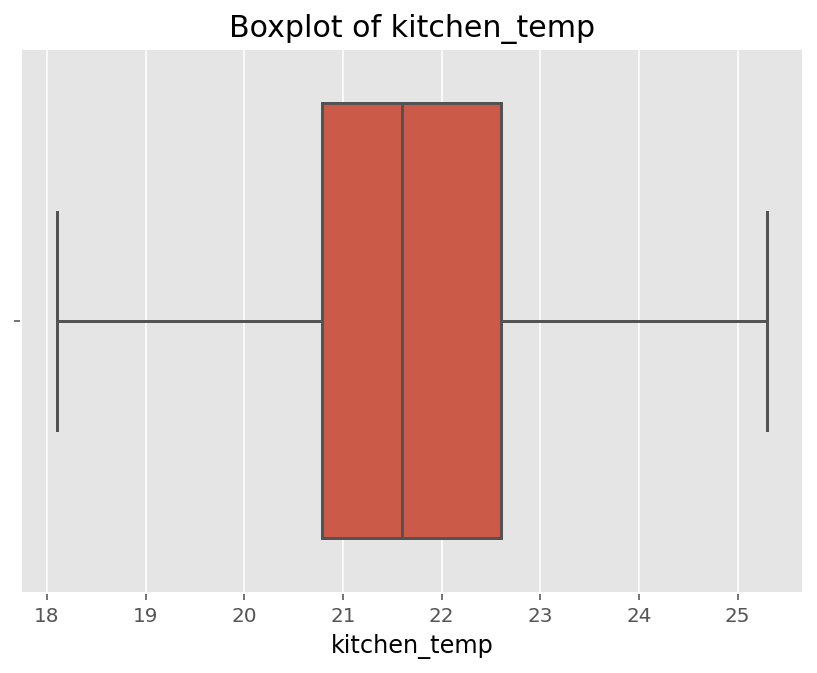

Number of "kitchen_humid" outliers: 0


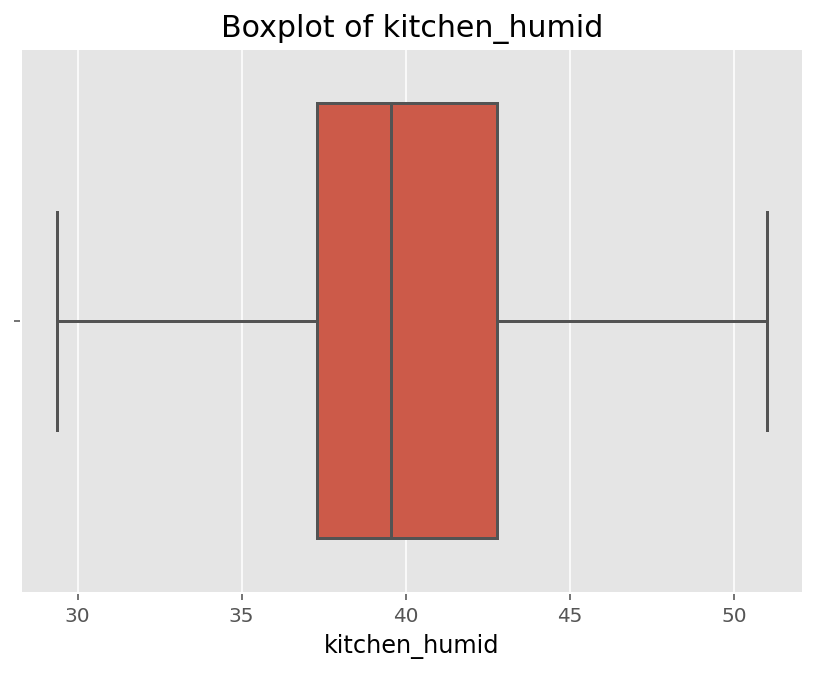

Number of "living_temp" outliers: 475


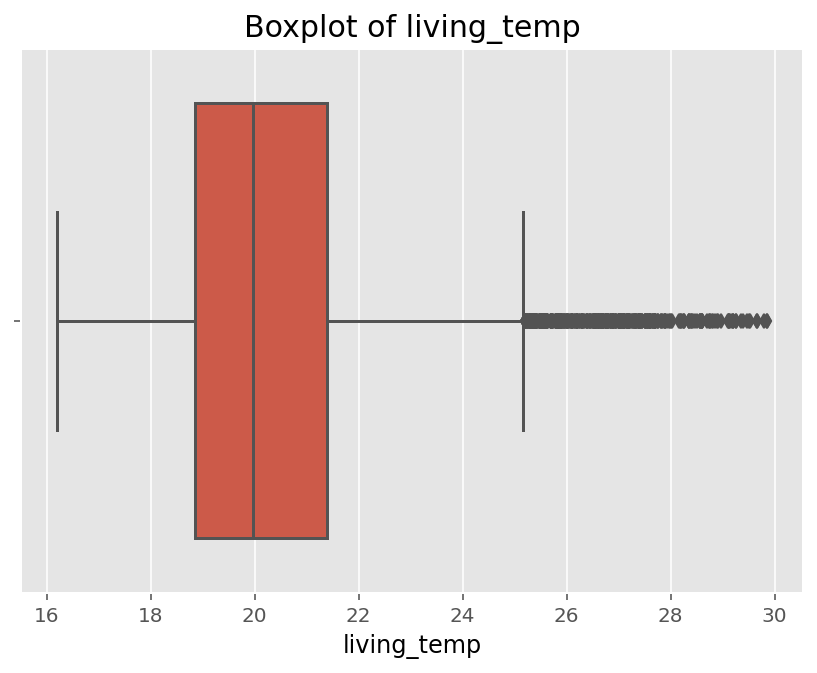

In [21]:
q1_val = df['kitchen_temp'].quantile(0.25)
q2_val = df['kitchen_temp'].quantile(0.50) # this is also the median
q3_val = df['kitchen_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
kitchen_temp_outliers = df[(df['kitchen_temp'] < min_whisker) | (df['kitchen_temp'] > max_whisker)]['kitchen_temp']
print('Number of "kitchen_temp" outliers:', kitchen_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['kitchen_temp'])
plt.title('Boxplot of kitchen_temp', fontsize = 15)
plt.xlabel('kitchen_temp', color='black')
plt.show()
df = df.drop(kitchen_temp_outliers.index)

q1_val = df['kitchen_humid'].quantile(0.25)
q2_val = df['kitchen_humid'].quantile(0.50) # this is also the median
q3_val = df['kitchen_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
kitchen_humid_outliers = df[(df['kitchen_humid'] < min_whisker) | (df['kitchen_humid'] > max_whisker)]['kitchen_humid']
print('Number of "kitchen_humid" outliers:', kitchen_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['kitchen_humid'])
plt.title('Boxplot of kitchen_humid', fontsize = 15)
plt.xlabel('kitchen_humid', color='black')
plt.show()
df = df.drop(kitchen_humid_outliers.index)

q1_val = df['living_temp'].quantile(0.25)
q2_val = df['living_temp'].quantile(0.50) # this is also the median
q3_val = df['living_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
living_temp_outliers = df[(df['living_temp'] < min_whisker) | (df['living_temp'] > max_whisker)]['living_temp']
print('Number of "living_temp" outliers:', living_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['living_temp'])
plt.title('Boxplot of living_temp', fontsize = 15)
plt.xlabel('living_temp', color='black')
plt.show()
df = df.drop(living_temp_outliers.index)

q1_val = df['living_humid'].quantile(0.25)
q2_val = df['living_humid'].quantile(0.50) # this is also the median
q3_val = df['living_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
living_humid_outliers = df[(df['living_humid'] < min_whisker) | (df['living_humid'] > max_whisker)]['living_humid']
print('Number of "living_humid" outliers:', living_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['living_humid'])
plt.title('Boxplot of living_humid', fontsize = 15)
plt.xlabel('living_humid', color='black')
plt.show()
df = df.drop(living_humid_outliers.index)

q1_val = df['laundry_temp'].quantile(0.25)
q2_val = df['laundry_temp'].quantile(0.50) # this is also the median
q3_val = df['laundry_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
laundry_temp_outliers = df[(df['laundry_temp'] < min_whisker) | (df['laundry_temp'] > max_whisker)]['laundry_temp']
print('Number of "laundry_temp" outliers:', laundry_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['laundry_temp'])
plt.title('Boxplot of laundry_temp', fontsize = 15)
plt.xlabel('laundry_temp', color='black')
plt.show()
df = df.drop(laundry_temp_outliers.index)

q1_val = df['laundry_humid'].quantile(0.25)
q2_val = df['laundry_humid'].quantile(0.50) # this is also the median
q3_val = df['laundry_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
laundry_humid_outliers = df[(df['laundry_humid'] < min_whisker) | (df['laundry_humid'] > max_whisker)]['laundry_humid']
print('Number of "laundry_humid" outliers:', laundry_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['laundry_humid'])
plt.title('Boxplot of laundry_humid', fontsize = 15)
plt.xlabel('laundry_humid', color='black')
plt.show()
df = df.drop(laundry_humid_outliers.index)

q1_val = df['office_temp'].quantile(0.25)
q2_val = df['office_temp'].quantile(0.50) # this is also the median
q3_val = df['office_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
office_temp_outliers = df[(df['office_temp'] < min_whisker) | (df['office_temp'] > max_whisker)]['office_temp']
print('Number of "office_temp" outliers:', office_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['office_temp'])
plt.title('Boxplot of office_temp', fontsize = 15)
plt.xlabel('office_temp', color='black')
plt.show()
df = df.drop(office_temp_outliers.index)

q1_val = df['office_humid'].quantile(0.25)
q2_val = df['office_humid'].quantile(0.50) # this is also the median
q3_val = df['office_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
office_humid_outliers = df[(df['office_humid'] < min_whisker) | (df['office_humid'] > max_whisker)]['office_humid']
print('Number of "office_humid" outliers:', office_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['office_humid'])
plt.title('Boxplot of office_humid', fontsize = 15)
plt.xlabel('office_humid', color='black')
plt.show()
df = df.drop(office_humid_outliers.index)

q1_val = df['bathroom_temp'].quantile(0.25)
q2_val = df['bathroom_temp'].quantile(0.50) # this is also the median
q3_val = df['bathroom_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
bathroom_temp_outliers = df[(df['bathroom_temp'] < min_whisker) | (df['bathroom_temp'] > max_whisker)]['bathroom_temp']
print('Number of "bathroom_temp" outliers:', bathroom_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['bathroom_temp'])
plt.title('Boxplot of bathroom_temp', fontsize = 15)
plt.xlabel('bathroom_temp', color='black')
plt.show()
df = df.drop(bathroom_temp_outliers.index)

q1_val = df['bathroom_humid'].quantile(0.25)
q2_val = df['bathroom_humid'].quantile(0.50) # this is also the median
q3_val = df['bathroom_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
bathroom_humid_outliers = df[(df['bathroom_humid'] < min_whisker) | (df['bathroom_humid'] > max_whisker)]['bathroom_humid']
print('Number of "bathroom_humid" outliers:', bathroom_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['bathroom_humid'])
plt.title('Boxplot of bathroom_humid', fontsize = 15)
plt.xlabel('bathroom_humid', color='black')
plt.show()
df = df.drop(bathroom_humid_outliers.index)

q1_val = df['out_north_temp'].quantile(0.25)
q2_val = df['out_north_temp'].quantile(0.50) # this is also the median
q3_val = df['out_north_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
out_north_temp_outliers = df[(df['out_north_temp'] < min_whisker) | (df['out_north_temp'] > max_whisker)]['out_north_temp']
print('Number of "out_north_temp" outliers:', out_north_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['out_north_temp'])
plt.title('Boxplot of out_north_temp', fontsize = 15)
plt.xlabel('out_north_temp', color='black')
plt.show()
df = df.drop(out_north_temp_outliers.index)

q1_val = df['out_north_humid'].quantile(0.25)
q2_val = df['out_north_humid'].quantile(0.50) # this is also the median
q3_val = df['out_north_humid'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
out_north_humid_outliers = df[(df['out_north_humid'] < min_whisker) | (df['out_north_humid'] > max_whisker)]['out_north_humid']
print('Number of "out_north_humid" outliers:', out_north_humid_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['out_north_humid'])
plt.title('Boxplot of out_north_humid', fontsize = 15)
plt.xlabel('out_north_humid', color='black')
plt.show()
df = df.drop(out_north_humid_outliers.index)

q1_val = df['ironing_temp'].quantile(0.25)
q2_val = df['ironing_temp'].quantile(0.50) # this is also the median
q3_val = df['ironing_temp'].quantile(0.75)
iqr = q3_val - q1_val
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
ironing_temp_outliers = df[(df['ironing_temp'] < min_whisker) | (df['ironing_temp'] > max_whisker)]['ironing_temp']
print('Number of "ironing_temp" outliers:', ironing_temp_outliers.shape[0])
plt.figure(figsize = (7,5))
sns.boxplot(df['ironing_temp'])
plt.title('Boxplot of ironing_temp', fontsize = 15)
plt.xlabel('ironing_temp', color='black')
plt.show()
df = df.drop(ironing_temp_outliers.index)